In [166]:
'''
b(i)
'''
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from IPython.display import display, Markdown
powerPlant_data  = pd.DataFrame()
ignore_index = False 
#reading n number of sheets from xlsx file
for i in range (1):
    if i != 0: 
        ignore_index = True
    temp_powerPlant_data = pd.read_excel("Folds5x2_pp.xlsx", sep=" ", sheet_name=i)
    powerPlant_data = powerPlant_data.append(temp_powerPlant_data, ignore_index=ignore_index)
        
display(Markdown ("There are: " + str(powerPlant_data.shape[0]) + 
                  " rows and " + str(powerPlant_data.shape[1]) + " columns"))
        
display(Markdown ("Rows represent index and columns represent features and response"))

There are: 9568 rows and 5 columns

Rows represents index and columns represents features and response

The first four scatterplots represent relationship                   between indiviual features and the response, we can see that there is obvious pattern between                   them. By increasing our independent variables we observe change in the same trend of the                   dependent variable PE

The last six scatterplots represent relationship                   between pairwise features and the response. The pattern is distinguishable by color, with yellow being                   high PE value and purple being low PE value. We observes that PE tend to increase or decrease                   in one direction depending on the interaction between different paris of features.

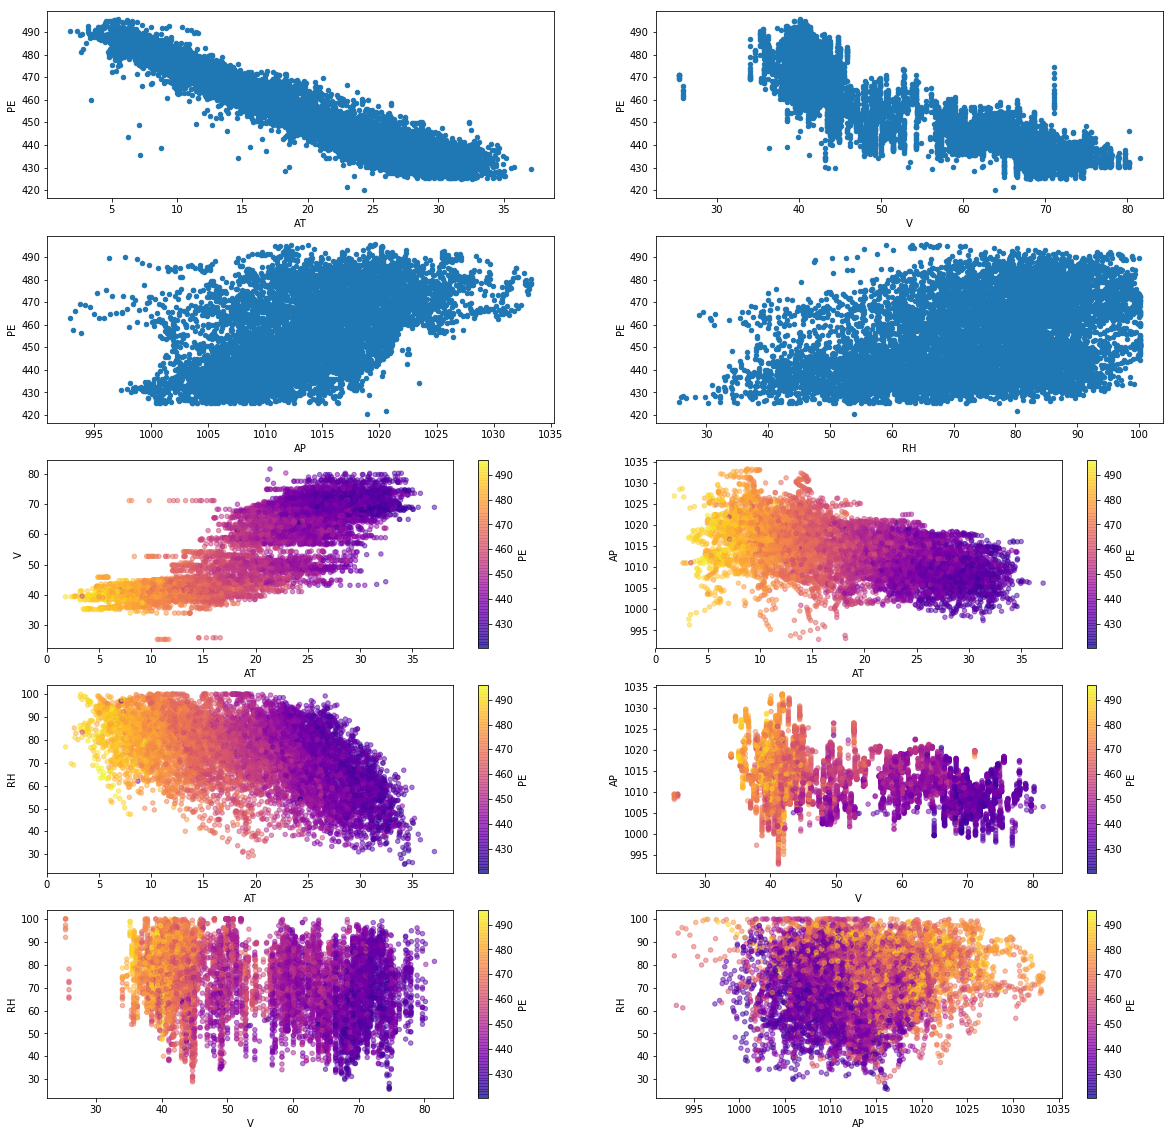

In [169]:
'''
b(ii)
'''
fig, axes = plt.subplots(nrows=5, ncols=2)
column_names = list(powerPlant_data)
index = 0
for i in range(4): 
    x_label = column_names[i]
    y_label = column_names[4]
    powerPlant_data.plot(kind="scatter", x=x_label, y=y_label, ax = axes[int(index/2), index%2], figsize=(20,20))
    plt.xlabel(x_label) 
    plt.ylabel(y_label)
    index += 1

for i in range(3):
    for j in range(i+1, 4): 
        x_label = column_names[i]
        y_label = column_names[j]
        powerPlant_data.plot(kind="scatter", x=x_label, y=y_label, c=column_names[4], alpha = 0.5, 
                            colormap='plasma', ax = axes[int(index/2), index%2], figsize=(20,20))
        plt.xlabel(x_label) 
        plt.ylabel(y_label)
        index += 1
        
display(Markdown ("The first four scatterplots represent relationship \
                  between indiviual features and the response, we can see that there is obvious pattern between \
                  them. By increasing our independent variables we observe change in the same trend of the \
                  dependent variable PE"))

display(Markdown ("The last six scatterplots represent relationship \
                  between pairwise features and the response. The pattern is distinguishable by color, with yellow being \
                  high PE value and purple being low PE value. We observes that PE tend to increase or decrease \
                  in one direction depending on the interaction between different paris of features."))

In [4]:
'''
b(iii)
'''
statistics_data = []
statistics_column_names = ["mean", "median", "dataRange", "firstQuartile", "thirdQuartile", "interquartile"]
statistics_row_names = ["AT", "V", "AP", "RH"]
for i in range(4):
    mean = powerPlant_data[column_names[i]].mean()
    median = powerPlant_data[column_names[i]].median()
    dataRange = powerPlant_data[column_names[i]].max() - powerPlant_data[column_names[i]].min()
    firstQuartile = powerPlant_data[column_names[i]].quantile(0.25)
    thirdQuartile = powerPlant_data[column_names[i]].quantile(0.75)
    interquartile = thirdQuartile - firstQuartile
    statistics = [mean, median, dataRange, firstQuartile, thirdQuartile, interquartile]
    statistics_data.append(statistics)

pd_statistics_data = pd.DataFrame.from_records(statistics_data, columns=statistics_column_names, index=statistics_row_names)
pd_statistics_data

,mean,median,dataRange,firstQuartile,thirdQuartile,interquartile
AT,19.651231,20.345,35.30,13.5100,25.72,12.2100
V,54.305804,52.080,56.20,41.7400,66.54,24.8000
AP,1013.259078,1012.940,40.41,1009.1000,1017.26,8.1600
RH,73.308978,74.975,74.60,63.3275,84.83,21.5025


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Tue, 05 Feb 2019   Prob (F-statistic):               0.00
Time:                        23:47:56   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        497.0341      0.156   3177.280      0.0

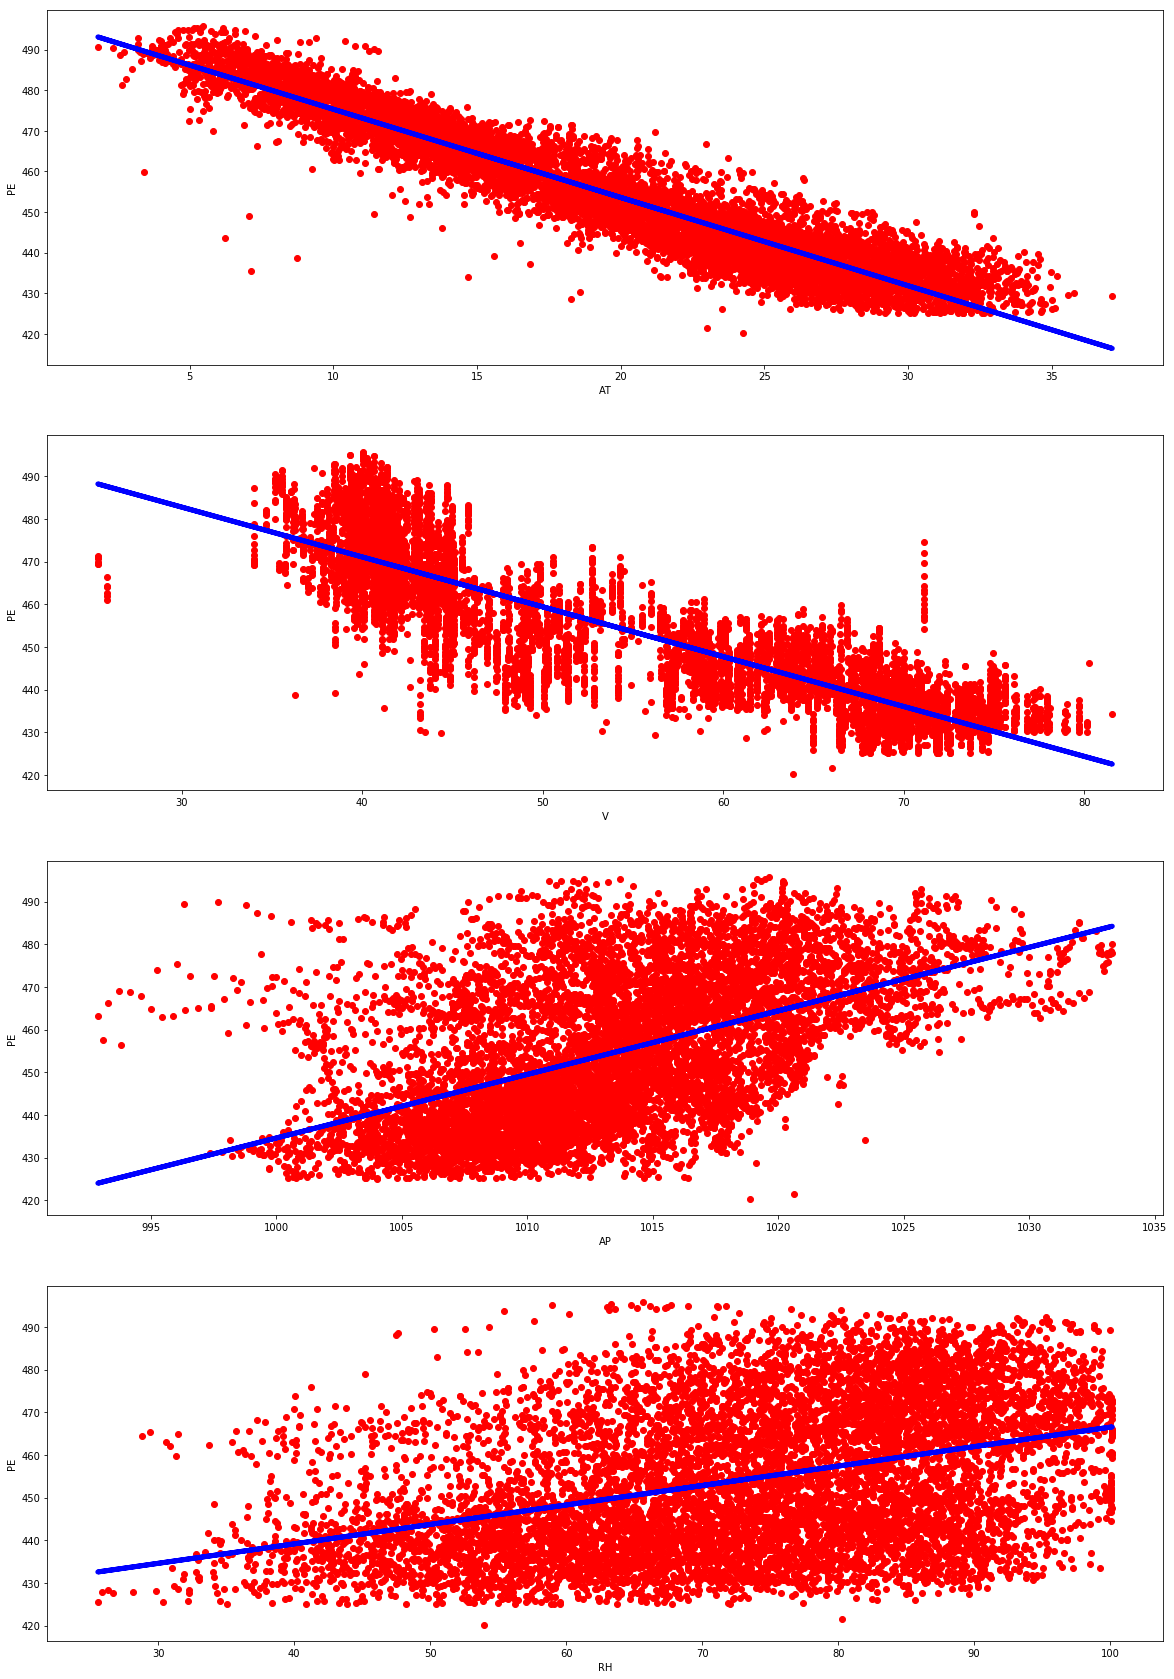

There are statistical significants for all linear relationships between each feature and the response.                This is beacuse the p-values are very small for all regresion results. This give as sufficient evidence to                 reject the null hypothesis in favor of the alternative hypothesis that there is association between                the feature and the response.

An outlier is a data point that falls outside of inner or outer                 fence of that data's range. Some of values in feature V looks like too far to the left to be considered                as outliers. Other than these, other values seem fine.

In [171]:
'''
c
'''
import statsmodels.api as sm 
linear_reg = linear_model.LinearRegression()
fig, axes = plt.subplots(4, sharex=False, figsize=(20,30))
np_train_targets = powerPlant_data.iloc[:,4:5].values.astype('float32').ravel()
np_train_targets = np_train_targets.reshape(-1, 1)
x_axis = []
for i in range (4):
    # convert to numpy arrays of features and targets 
    np_train_features =  powerPlant_data.iloc[:,i:i+1].values.astype('float32').ravel()
    np_train_features = np_train_features.reshape(-1, 1)
    linear_reg.fit(np_train_features, np_train_targets)
    # Make predictions using the testing set
    train_prediction = linear_reg.predict(np_train_features)
    #print('Coefficients: ', linear_reg.coef_)
    x_axis.append(linear_reg.coef_[0][0])
    # Plot outputs
    axes[i].scatter(np_train_features, np_train_targets,  color='red')
    axes[i].plot(np_train_features, train_prediction, color='blue', linewidth=5)
    axes[i].set_xlabel(column_names[i])
    axes[i].set_ylabel('PE')
    smodel = sm.OLS(np_train_targets, sm.add_constant(np_train_features)).fit()
    print(smodel.summary())
plt.show()

display(Markdown ("There are statistical significants for all linear relationships between each feature and the response.\
                This is beacuse the p-values are very small for all regresion results. This give as sufficient evidence to \
                reject the null hypothesis in favor of the alternative hypothesis that there is association between\
                the feature and the response."))

display(Markdown ("An outlier is a data point that falls outside of inner or outer \
                fence of that data's range. Some of values in feature V looks like too far to the left to be considered\
                as outliers. Other than these, other values seem fine."))

In [172]:
'''
d
'''
train_features = powerPlant_data[["AT", "V", "AP", "RH"]]
smodel = sm.OLS(np_train_targets, sm.add_constant(train_features)).fit()
print(smodel.summary())
display(Markdown ("There are statistical significant of multilinear relationship between predictors and the feature. \
                As p-values for all coeffients are very small, we have sufficient evidence to \
                reject the null hypothesis in favor of the alternative hypothesis that there is association between\
                the response and all the predictors."))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Tue, 05 Feb 2019   Prob (F-statistic):               0.00
Time:                        23:58:19   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.6093      9.749     46.634      0.0

There are statistical significant of multilinear relationship between predictors and the feature.                 As p-values for all coeffients are very small, we have sufficient evidence to                 reject the null hypothesis in favor of the alternative hypothesis that there is association between                the response and all the predictors.

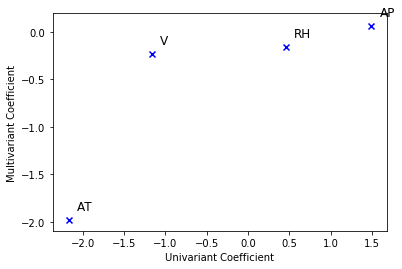

The AT predictor's coefficient doesn't change much at -2.0. The V predictor's coefficient increased from                   -1.16 to -0.2. The RH predictor's coefficient decreased from 0.5 to -0.15.                   The AP predictor's coefficient decreased from 1.5 to 0.06

In [173]:
'''
e
x_axis from part c
Annotated scatter plot: https://www.pythonmembers.club/2018/05/08/matplotlib-scatter-plot-annotate-set-text-at-label-each-point/
'''
y_axis = [] 
for i in range (4):
    # skip interception
    y_axis.append(smodel.params[i+1]) 
feature_names = ["AT", "V", "AP", "RH"]
for i,feature in enumerate(feature_names):
    x = x_axis[i]
    y = y_axis[i]
    plt.scatter(x, y, marker="x", color="blue")
    plt.text(x+0.1, y+0.1, feature, fontsize=12)
plt.xlabel("Univariant Coefficient")
plt.ylabel("Multivariant Coefficient")
plt.show()
display(Markdown ("The AT predictor's coefficient doesn't change much at -2.0. The V predictor's coefficient increased from \
                  -1.16 to -0.2. The RH predictor's coefficient decreased from 0.5 to -0.15. \
                  The AP predictor's coefficient decreased from 1.5 to 0.06"))

In [175]:
'''
f
'''
for i in range(4):
    non_linear_data = powerPlant_data.iloc[:,i:i+1]
    for j in range (2): 
        non_linear_data = pd.concat([non_linear_data, powerPlant_data.iloc[:,i:i+1]], axis=1)
        non_linear_data.iloc[:, j+1] = non_linear_data.iloc[:, j+1]**(j+2)
    non_linear_data.columns = [feature_names[i], feature_names[i]+"^2", feature_names[i]+"^3"]
    smodel = sm.OLS(np_train_targets, sm.add_constant(non_linear_data)).fit()
    print(smodel.summary())
display(Markdown ("There is nonlinear association between all predictors and the response. For predictor V, there is\
                insignificant association between the response and V^2 as its p-value is large."))  

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Wed, 06 Feb 2019   Prob (F-statistic):               0.00
Time:                        00:07:46   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        492.7281      0.673    732.248      0.0

There is nonlinear association between all predictors and the response. For predictor V, there is                insignificant association between the response and V^2 as its p-value is large.

In [176]:
'''
g
'''
interaction_features = train_features
for i in range (3): # i {0, 1, 2}
    for j in range (i+1, 4): # j {1, 2, 3; 2, 3; 3}
        interaction_terms = pd.DataFrame()
        temp_name = feature_names[i] + " interact " + feature_names[j]
        interaction_terms[temp_name] = powerPlant_data[feature_names[i]].mul(powerPlant_data[feature_names[j]])
        interaction_features = interaction_features.join(interaction_terms)
smodel = sm.OLS(np_train_targets, sm.add_constant(interaction_features)).fit()
print(smodel.summary())
display(Markdown ("There is evidence of association of interactions of predictors with the response. This is \
                because most of the association's coefficients have small p-values. There is exception for \
                the association of AT interact AP and V interact RH with the response as \
                their p-values are large, suggesting insignificant of association ")) 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Wed, 06 Feb 2019   Prob (F-statistic):               0.00
Time:                        00:13:21   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            685.7825     78.640      8.

There is evidence of association of interactions of predictors with the response. This is                 because most of the association's coefficients have small p-values. There is exception for                 the association of AT interact AP and V interact RH with the response as                 their p-values are large, suggesting insignificant of association 

In [177]:
'''
h(normal features, random sample)
random sample: https://stackoverflow.com/questions/24147278/how-do-i-create-test-and-train-samples-from-one-dataframe-with-pandas
'''
from sklearn.metrics import mean_squared_error
msk = np.random.rand(len(powerPlant_data)) <= 0.7

#random_powerPlant_data = powerPlant_data.sample(frac=0.7)
random_powerPlant_train_data = powerPlant_data[msk]
random_powerPlant_test_data = powerPlant_data[~msk]
random_train_features = random_powerPlant_train_data[feature_names]
random_train_targets = random_powerPlant_train_data["PE"]
random_test_features = random_powerPlant_test_data[feature_names]
random_test_targets = random_powerPlant_test_data["PE"]
#regular model 
train_model = sm.OLS(random_train_targets, sm.add_constant(random_train_features)).fit()
print(train_model.summary())
#train
train_results = train_model.predict(sm.add_constant(random_train_features))
train_mse_regular = mean_squared_error(random_train_targets, train_results)
print ("\n\nTRAIN Data MSE is :" , train_mse_regular)
# test
test_results = train_model.predict(sm.add_constant(random_test_features))
test_mse_regular = mean_squared_error(random_test_targets, test_results)
print ("TEST Data MSE is :" , test_mse_regular)



                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 2.191e+04
Date:                Wed, 06 Feb 2019   Prob (F-statistic):               0.00
Time:                        00:14:25   Log-Likelihood:                -19657.
No. Observations:                6696   AIC:                         3.932e+04
Df Residuals:                    6691   BIC:                         3.936e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        445.6262     11.705     38.070      0.0

In [178]:
'''
h(continue all features)
'''
# from f 
extra_train_features = pd.DataFrame() 
extra_test_features = pd.DataFrame() 
for i in range(4):
    non_linear_data_train = pd.DataFrame() 
    non_linear_data_test = pd.DataFrame() 
    for j in range (2): 
        #train
        non_linear_data_train = pd.concat([non_linear_data_train, random_train_features.iloc[:,i:i+1]], axis=1)
        non_linear_data_train.iloc[:, j] = non_linear_data_train.iloc[:, j]**(j+2)
        #test
        non_linear_data_test = pd.concat([non_linear_data_test, random_test_features.iloc[:,i:i+1]], axis=1)
        non_linear_data_test.iloc[:, j] = non_linear_data_test.iloc[:, j]**(j+2)
    #train 
    non_linear_data_train.columns = [feature_names[i]+"^2", feature_names[i]+"^3"]
    extra_train_features = pd.concat([extra_train_features, non_linear_data_train], axis=1)
    #test
    non_linear_data_test.columns = [feature_names[i]+"^2", feature_names[i]+"^3"]
    extra_test_features = pd.concat([extra_test_features, non_linear_data_test], axis=1)

# from g
interaction_features_train = pd.DataFrame()
interaction_features_test = pd.DataFrame()
for i in range (3): # i {0, 1, 2}
    for j in range (i+1, 4): # j {1, 2, 3; 2, 3; 3}
        temp_name = feature_names[i] + " interact " + feature_names[j]
        #train
        interaction_terms_train = pd.DataFrame()
        interaction_terms_train[temp_name] = random_train_features[feature_names[i]].mul(random_train_features[feature_names[j]])
        interaction_features_train = pd.concat([interaction_features_train, interaction_terms_train], axis=1)
        #test
        interaction_terms_test = pd.DataFrame()
        interaction_terms_test[temp_name] = random_test_features[feature_names[i]].mul(random_test_features[feature_names[j]])
        interaction_features_test = pd.concat([interaction_features_test, interaction_terms_test], axis=1)
        
#train
extra_train_features = pd.concat([extra_train_features, interaction_features_train], axis=1)
random_train_features_All = pd.concat([random_train_features, extra_train_features], axis=1)
#test
extra_test_features = pd.concat([extra_test_features, interaction_features_test], axis=1)
random_test_features_All = pd.concat([random_test_features, extra_test_features], axis=1)

#all features 
train_model_all = sm.OLS(random_train_targets, sm.add_constant(random_train_features_All)).fit()
print(train_model_all.summary())

train_results = train_model_all.predict(sm.add_constant(random_train_features_All))
train_mse_all = mean_squared_error(random_train_targets, train_results)
print ("\n\nTRAIN Data MSE all feature is :" , train_mse_all)

test_results = train_model_all.predict(sm.add_constant(random_test_features_All))
test_mse_all = mean_squared_error(random_test_targets, test_results)
print ("TEST Data MSE all feature is :" , mse_regular)

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     6073.
Date:                Wed, 06 Feb 2019   Prob (F-statistic):               0.00
Time:                        00:14:40   Log-Likelihood:                -19138.
No. Observations:                6696   AIC:                         3.831e+04
Df Residuals:                    6678   BIC:                         3.843e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0224      0.004     -5.

In [179]:
'''
h(continue pruned features)
'''
columns_all = random_train_features_All.columns
print (columns_all)
columns_to_drop = []
for i in range(len(columns_all)): 
    # if high p value and not one of the main features 
    if train_model_all.pvalues[1 + i] > 0.05 and i > 3: 
        columns_to_drop.append(columns_all[i])
print ("Columns to prune: " , columns_to_drop)
pruned_random_train_features_All = random_train_features_All.drop(columns_to_drop, axis=1)
pruned_random_test_features_All = random_test_features_All.drop(columns_to_drop, axis=1)


#pruned features 
train_model_prune = sm.OLS(random_train_targets, sm.add_constant(pruned_random_train_features_All)).fit()
print(train_model_prune.summary())
#train 
train_results = train_model_prune.predict(sm.add_constant(pruned_random_train_features_All))
train_mse_pruned = mean_squared_error(random_train_targets, train_results)
print ("\n\nTRAIN Data MSE pruned features is :" , train_mse_pruned)
#test
test_results = train_model_prune.predict(sm.add_constant(pruned_random_test_features_All))
test_mse_pruned = mean_squared_error(random_test_targets, test_results)
print ("TEST Data MSE pruned features is :" , test_mse_pruned)


Index(['AT', 'V', 'AP', 'RH', 'AT^2', 'AT^3', 'V^2', 'V^3', 'AP^2', 'AP^3',
       'RH^2', 'RH^3', 'AT interact V', 'AT interact AP', 'AT interact RH',
       'V interact AP', 'V interact RH', 'AP interact RH'],
      dtype='object')
Columns to prune:  ['RH^2', 'RH^3', 'AT interact V', 'AT interact AP', 'V interact AP', 'V interact RH']
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     9279.
Date:                Wed, 06 Feb 2019   Prob (F-statistic):               0.00
Time:                        00:14:52   Log-Likelihood:                -19177.
No. Observations:                6696   AIC:                         3.838e+04
Df Residuals:                    6684   BIC:                         3.846e+04
Df Model:                    

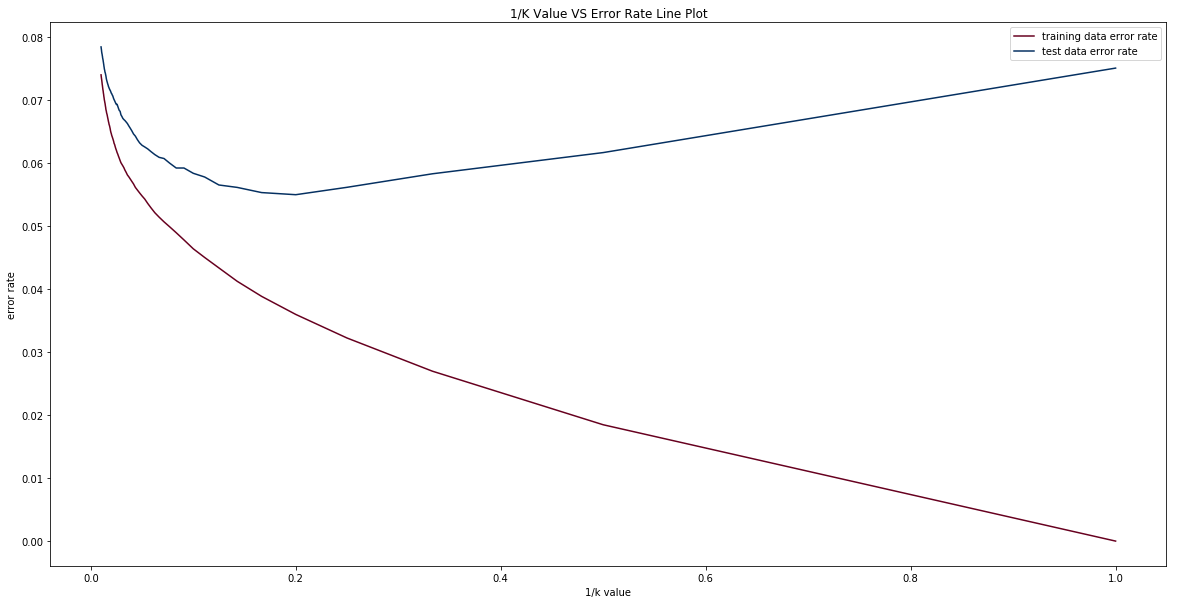

k* with value: 5.0 has the lowest test error rate: 0.05494054905666845
k* with value: 5.0 has the lowest test MSE: 15.798773118384412


In [181]:
'''
i(raw)
'''

from sklearn.neighbors import KNeighborsRegressor
np_train_features = random_train_features.values
np_train_targets = random_train_targets.values
np_test_features = random_test_features.values
np_test_targets = random_test_targets.values
trainData_errorRates = []
testData_errorRates = []
trainData_mse = []
testData_mse = []
reverse_k_values = []
for k in range(1, 101, 1):
    neigh = KNeighborsRegressor(n_neighbors=k) 
    neigh.fit(np_train_features, np_train_targets) 
    trainData_errorRates.append( 1 - neigh.score(np_train_features, np_train_targets))
    testData_errorRates.append( 1 - neigh.score(np_test_features, np_test_targets))
    trainData_mse.append(mean_squared_error(np_train_targets,neigh.predict(np_train_features)))
    testData_mse.append(mean_squared_error(np_test_targets,neigh.predict(np_test_features)))
    reverse_k_values.append(1/k)

error_data = []
error_data.append(reverse_k_values)
error_data.append(trainData_errorRates)
error_data.append(testData_errorRates)
error_data = [*zip(*error_data)] # matrix transpose 
pd_error_data = pd.DataFrame.from_records(error_data, columns=["1/k value", "training data error rate", "test data error rate"])
pd_error_data.plot(x="1/k value", y=["training data error rate", "test data error rate"], colormap='RdBu', figsize=(20,10))

plt.xlabel("1/k value") 
plt.ylabel("error rate")
plt.title("1/K Value VS Error Rate Line Plot")
plt.show()

min_test_error = min(testData_errorRates)
min_error_index = testData_errorRates.index(min_test_error)
k_star = reverse_k_values[min_error_index] 
print ("k* with value: " +  str(1/k_star) + " has the lowest test error rate: " + str(min_test_error))

min_test_mse = min(testData_mse)
min_test_mse_index = testData_mse.index(min_test_mse)
k_star_mse = reverse_k_values[min_test_mse_index] 
print ("k* with value: " +  str(1/k_star_mse) + " has the lowest test MSE: " + str(min_test_mse))

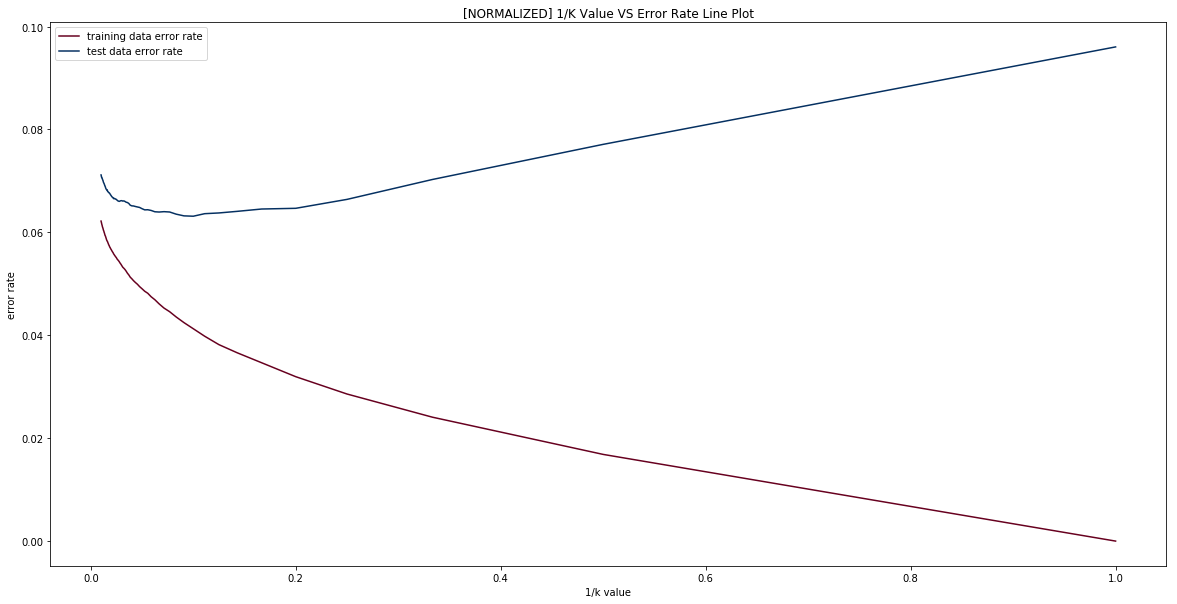

[NORMALIZED] k* with value: 10.0 has the lowest test error rate: 0.06313437233963204
[NORMALIZED] k* with value: 10.0 has the lowest test MSE: 18.154999207172704


In [182]:
'''
i(normalize)
normalize: https://stackoverflow.com/questions/26414913/normalize-columns-of-pandas-data-frame
'''
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
np_train_features_scaled = min_max_scaler.fit_transform(np_train_features)
np_test_features_scaled = min_max_scaler.fit_transform(np_test_features)

trainData_errorRates = []
testData_errorRates = []
trainData_mse = []
testData_mse = []
reverse_k_values = []
for k in range(1, 101, 1):
    neigh = KNeighborsRegressor(n_neighbors=k) 
    neigh.fit(np_train_features_scaled, np_train_targets) 
    trainData_errorRates.append(1 - neigh.score(np_train_features_scaled, np_train_targets))
    testData_errorRates.append( 1 - neigh.score(np_test_features_scaled, np_test_targets))
    trainData_mse.append(mean_squared_error(np_train_targets,neigh.predict(np_train_features_scaled)))
    testData_mse.append(mean_squared_error(np_test_targets,neigh.predict(np_test_features_scaled)))
    reverse_k_values.append(1/k)

error_data = []
error_data.append(reverse_k_values)
error_data.append(trainData_errorRates)
error_data.append(testData_errorRates)
error_data = [*zip(*error_data)] # matrix transpose 
pd_error_data = pd.DataFrame.from_records(error_data, columns=["1/k value", "training data error rate", "test data error rate"])
pd_error_data.plot(x="1/k value", y=["training data error rate", "test data error rate"], colormap='RdBu', figsize=(20,10))

plt.xlabel("1/k value") 
plt.ylabel("error rate")
plt.title("[NORMALIZED] 1/K Value VS Error Rate Line Plot")
plt.show()

min_test_error = min(testData_errorRates)
min_error_index = testData_errorRates.index(min_test_error)
k_star = reverse_k_values[min_error_index] 
print ("[NORMALIZED] k* with value: " +  str(1/k_star) + " has the lowest test error rate: " + str(min_test_error))

min_test_mse = min(testData_mse)
min_test_mse_index = testData_mse.index(min_test_mse)
k_star_mse = reverse_k_values[min_test_mse_index] 
print ("[NORMALIZED] k* with value: " +  str(1/k_star_mse) + " has the lowest test MSE: " + str(min_test_mse))



### j. Analysis: 
The KNN models (normalized, raw) slightly outperforms linear-regression models (model with basic features, model with additional features and model with pruned insignificant additional features). The best MSE achieved by min(linear-regression models) is around 17 and the best MSE achieved by min(KNN regressions) is around 15. Since KNN is run on p = 4 features, the KNN model is suppose to be inferior to linear-model because of the curse of dimensionality (ISLR p108). However for this data set, KNN is a little bit better, this may suggest the actual function f is not very linear. This can be further supported by the different linear-regression models. For instance, the model with non-linear terms and interaction terms perform better than the model with basic features only. Since p = 4 is not so big for KNN and since there are strong evidence to suggest the actual model is non-linear, KNN is outperforming linear model for this data set. 

 
